In [2]:
import cv2, numpy as np, mahotas as mh, matplotlib.pyplot as plt
img = mh.stretch(cv2.imread("Enhanced_DAPI.tif")); show_img = np.copy(img)

In [3]:
mouse_pressed = False
y = x = w = h = 0
def mouse_callback(event, _x, _y, flags, param):
    global show_img, x, y, w, h, mouse_pressed
    if event == cv2.EVENT_LBUTTONDOWN:
        mouse_pressed = True
        x, y = _x, _y
        show_img = np.copy(img)
    elif event == cv2.EVENT_MOUSEMOVE:
        if mouse_pressed:
            show_img = np.copy(img)
            cv2.rectangle(show_img, (x, y),
                         (_x, _y), (0, 255, 0), 2)
    elif event == cv2.EVENT_LBUTTONUP:
        mouse_pressed = False
        w, h = _x - x, _y - y

In [5]:
cv2.namedWindow('image'); cv2.setMouseCallback('image', mouse_callback)
while True:
    cv2.imshow('image', show_img); k = cv2.waitKey(1)
    if k == ord('a') and not mouse_pressed:
        if w*h > 0:
            break
cv2.destroyAllWindows()
template = np.copy(img[y:y+h, x:x+w]); ## Save template

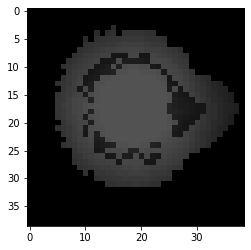

In [6]:
template_show = template.copy()
plt.imshow(template)

<b> Isolate with simple filtering methods

array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
       229.5, 255. ])

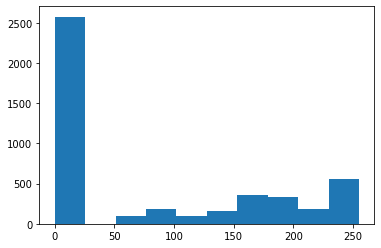

In [13]:
hist_data = plt.hist(mh.stretch(template.flatten()))
hist_data[-2]

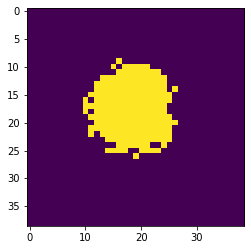

In [18]:
plt.imshow(mh.stretch(template.mean(axis = 2))>hist_data[-2][2])

<b> Option 1:  Shape Segmentation methods

In [ ]:
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template_show = template.copy()

In [33]:
circles = cv2.HoughCircles(template, cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)
    # ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
    print(circles.sum())
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(template, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(template, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

cv2.namedWindow("image", cv2.WINDOW_NORMAL)        # Create window with freedom of dimensions                      # Read image
imS = cv2.resize(template, (2000, 2000))                    # Resize image
cv2.imshow("image", imS)                            # Show image
cv2.waitKey(0)
cv2.destroyAllWindows()

Failed

<b> Option 2: Edge Detection method

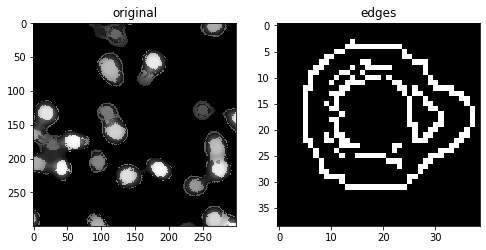

In [34]:
edges = cv2.Canny(template,100,200)
plt.figure(figsize=(8,5)); plt.tight_layout()
plt.subplot(121); plt.title('original')
plt.imshow(img[:,:,[2,1,0]])
plt.subplot(122); plt.title('edges')
plt.imshow(edges, cmap='gray')